**Importing spark**

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=bd130c3ac11d9eb1a9dc4aadd7a150e10373662706afd9f02ee840e3e49658dc
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


**Creating the spark session**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, BooleanType

spark = SparkSession.builder.appName("Crime data").getOrCreate()


**Loading dataset using spark**

In [ ]:
df = spark.read.csv("Crimes_-_2001_to_Present.csv", header=True, inferSchema=True)


**Printing the schema and columns**

In [ ]:
df.show()
df.printSchema()
print(f"Number of rows: {df.count()}")

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11037294|   JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK|

In [ ]:
df.describe().show()

+-------+--------------------+-----------+--------------------+------------------+-----------------+-----------------+--------------------+--------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+--------------------+-------------------+-------------------+--------------------+
|summary|                  ID|Case Number|                Date|             Block|             IUCR|     Primary Type|         Description|Location Description|             Beat|          District|              Ward|   Community Area|          FBI Code|      X Coordinate|      Y Coordinate|              Year|          Updated On|           Latitude|          Longitude|            Location|
+-------+--------------------+-----------+--------------------+------------------+-----------------+-----------------+--------------------+--------------------+-----------------+------------------+-----------------

**Dropping the na values**

In [ ]:
df1=df.na.drop()

In [ ]:
df1.describe().show()

+-------+--------------------+-----------+--------------------+------------------+------------------+-----------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+-------------------+--------------------+
|summary|                  ID|Case Number|                Date|             Block|              IUCR|     Primary Type|         Description|Location Description|              Beat|          District|              Ward|    Community Area|          FBI Code|      X Coordinate|      Y Coordinate|              Year|          Updated On|           Latitude|          Longitude|            Location|
+-------+--------------------+-----------+--------------------+------------------+------------------+-----------------+--------------------+--------------------+------------------+------------------+---------

In [ ]:
# Assuming you have a DataFrame named 'df'
df1.printSchema()  # Display the schema (column names and data types)
print(f"Number of rows: {df1.count()}")  # Count the number of rows in the DataFrame


root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)

Number of rows: 386681


In [ ]:
pri_agg = df1.groupBy("Primary Type").count()
pri_agg.show()


+--------------------+-----+
|        Primary Type|count|
+--------------------+-----+
|OFFENSE INVOLVING...| 3206|
|CRIMINAL SEXUAL A...| 1935|
|            STALKING|  519|
|PUBLIC PEACE VIOL...| 1510|
|           OBSCENITY|   75|
|               ARSON|  882|
|            GAMBLING|  356|
|   CRIMINAL TRESPASS| 8504|
|             ASSAULT|33078|
|LIQUOR LAW VIOLATION|  404|
| MOTOR VEHICLE THEFT|22606|
|               THEFT|75656|
|             BATTERY|73198|
|             ROBBERY|15747|
|            HOMICIDE|  124|
|    PUBLIC INDECENCY|    9|
| CRIM SEXUAL ASSAULT|  338|
|   HUMAN TRAFFICKING|   14|
|        INTIMIDATION|  233|
|        PROSTITUTION| 1391|
+--------------------+-----+
only showing top 20 rows



**Plot 1: Count of all the primary types of crimes**

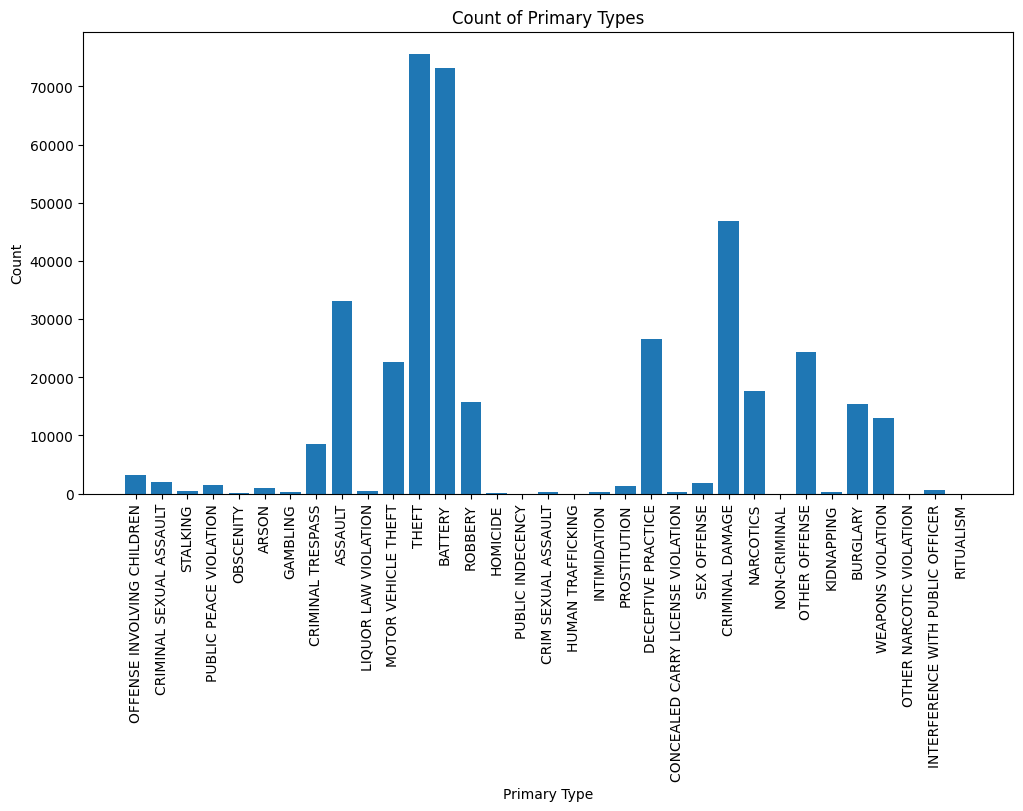

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pri_agg_df = pri_agg.toPandas()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(pri_agg_df["Primary Type"], pri_agg_df["count"])
plt.xlabel("Primary Type")
plt.ylabel("Count")
plt.title("Count of Primary Types")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()




**Plot 2: Count of crimes location wise**

+--------------------+-----+
|Location Description|count|
+--------------------+-----+
|SCHOOL - PRIVATE ...|  244|
|AIRPORT TERMINAL ...|  221|
|VEHICLE - COMMERCIAL|  245|
|RESIDENCE - YARD ...| 3617|
|POLICE FACILITY/V...|  212|
|CHA PARKING LOT /...|  566|
|            SIDEWALK|26153|
|AIRPORT TERMINAL ...|   11|
|OTHER RAILROAD PR...|  121|
|CTA GARAGE / OTHE...|  127|
|            CAR WASH|  205|
|    AIRPORT/AIRCRAFT|  300|
|    FEDERAL BUILDING|   57|
|MEDICAL/DENTAL OF...|   88|
|         CTA STATION|  504|
|SCHOOL, PUBLIC, G...|  426|
|SPORTS ARENA/STADIUM|   57|
|                FARM|    1|
|            CEMETARY|   23|
|               HOUSE|    5|
+--------------------+-----+
only showing top 20 rows



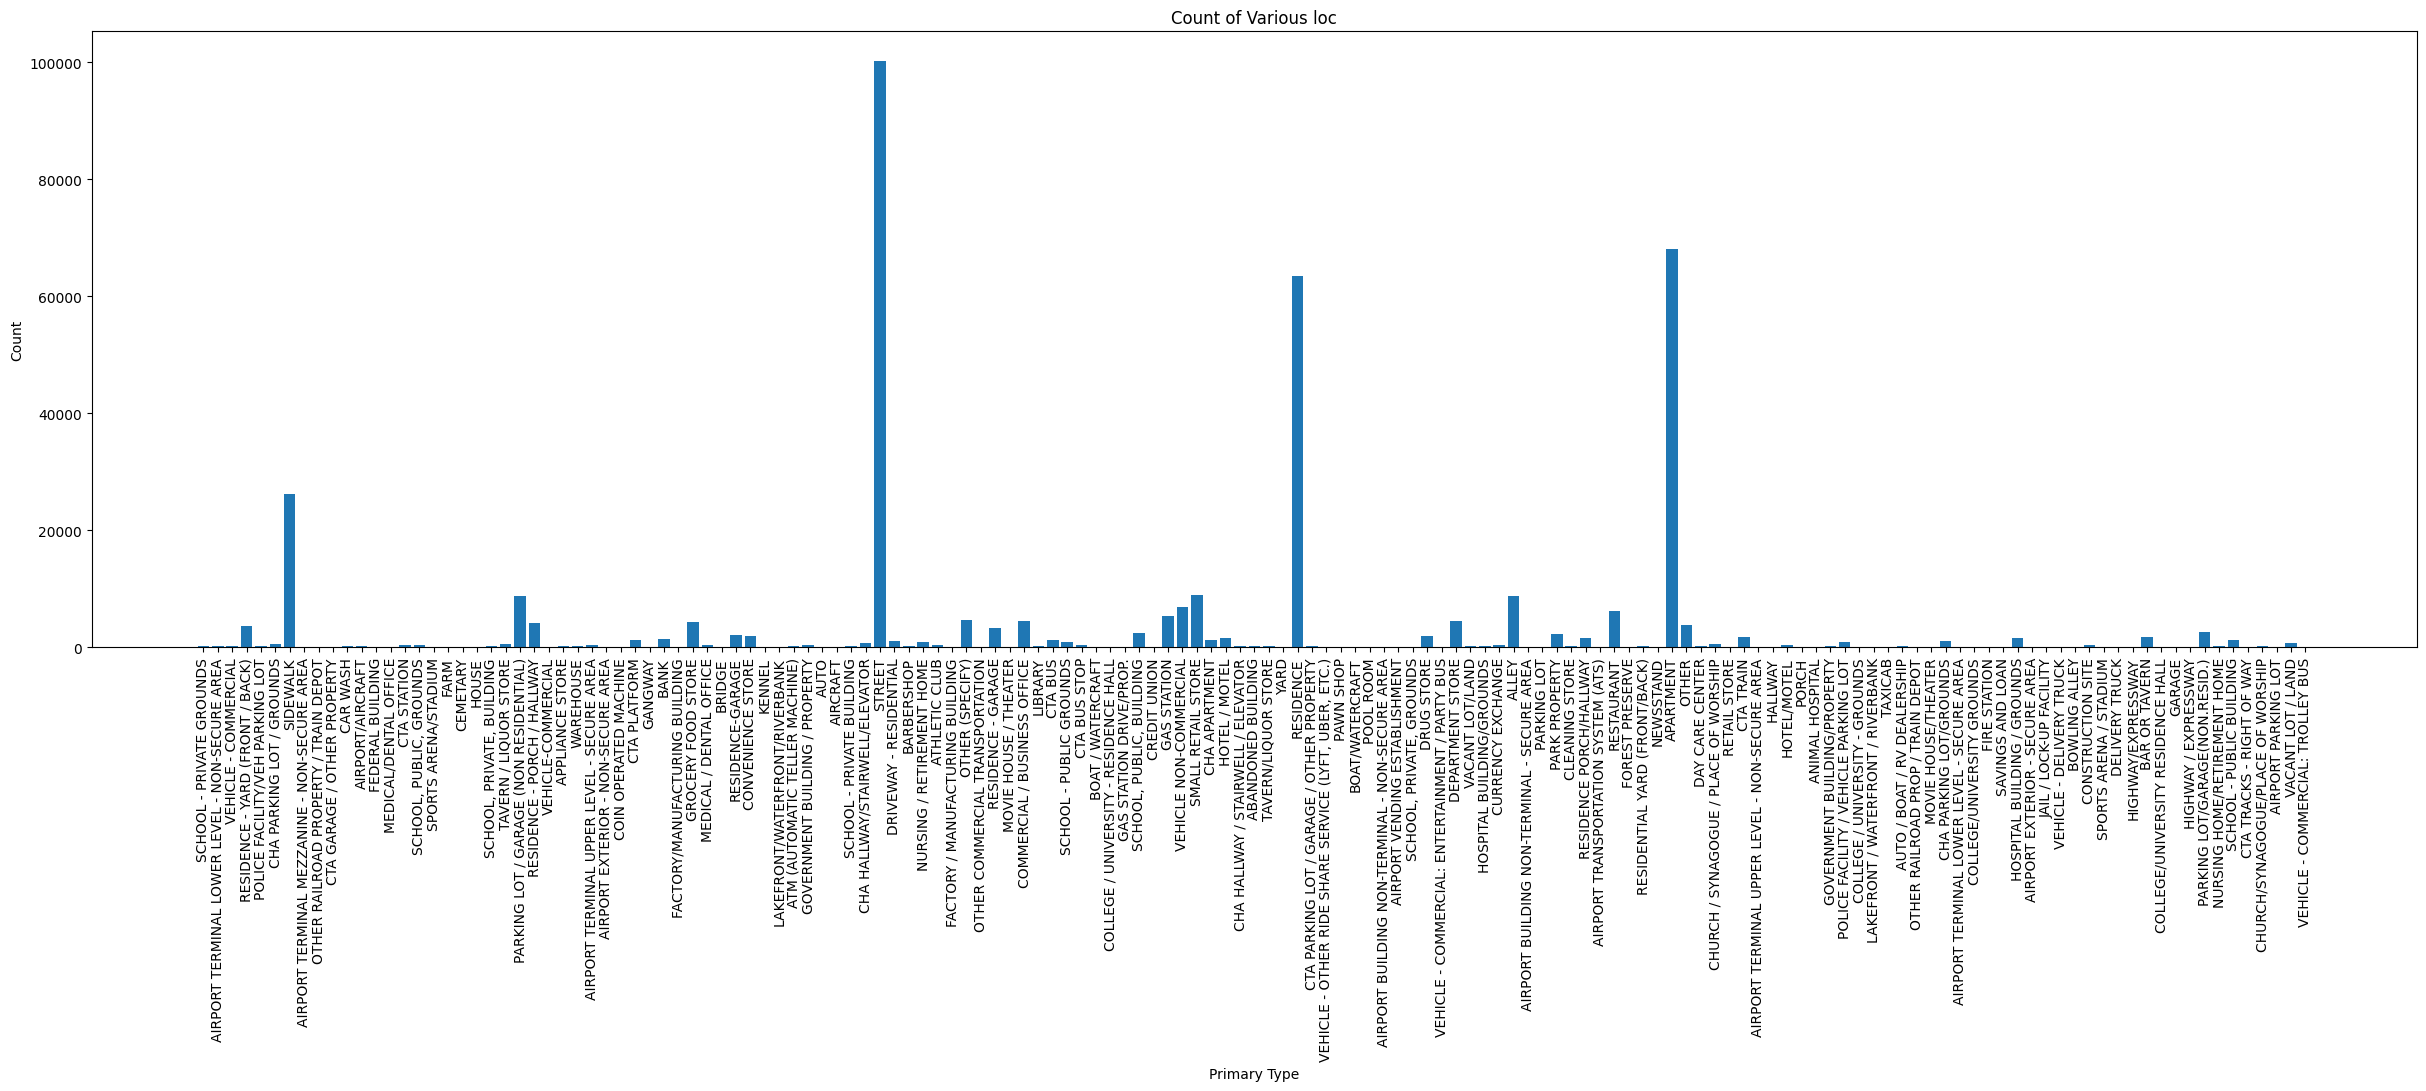

In [ ]:
loc_agg = df1.groupBy("Location Description").count()
loc_agg.show()

loc_agg_df = loc_agg.toPandas()

# Create a bar plot
plt.figure(figsize=(30, 8))
plt.bar(loc_agg_df["Location Description"], loc_agg_df["count"])
plt.xlabel("Primary Type")
plt.ylabel("Count")
plt.title("Count of Various loc")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

**Plot 3: Arres ratio**

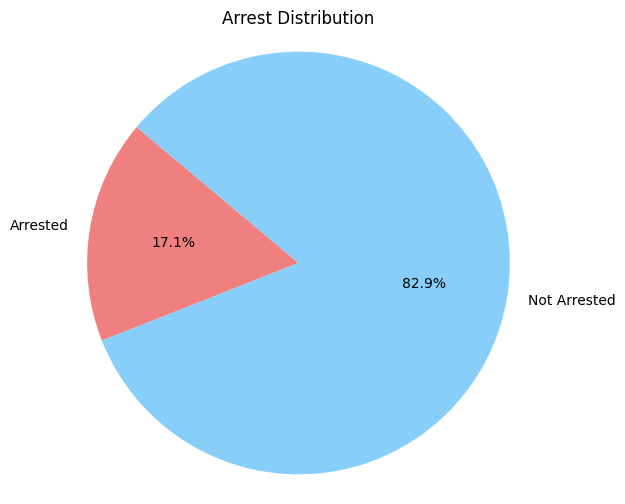

In [ ]:
arrest_agg = df1.groupBy("Arrest").count()
arrest_agg_df = arrest_agg.toPandas()

# Create a pie chart
labels = ["Arrested", "Not Arrested"]
sizes = arrest_agg_df["count"]
colors = ["lightcoral", "lightskyblue"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Arrest Distribution")
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

**Plot 4: Crime vs Arrests done**

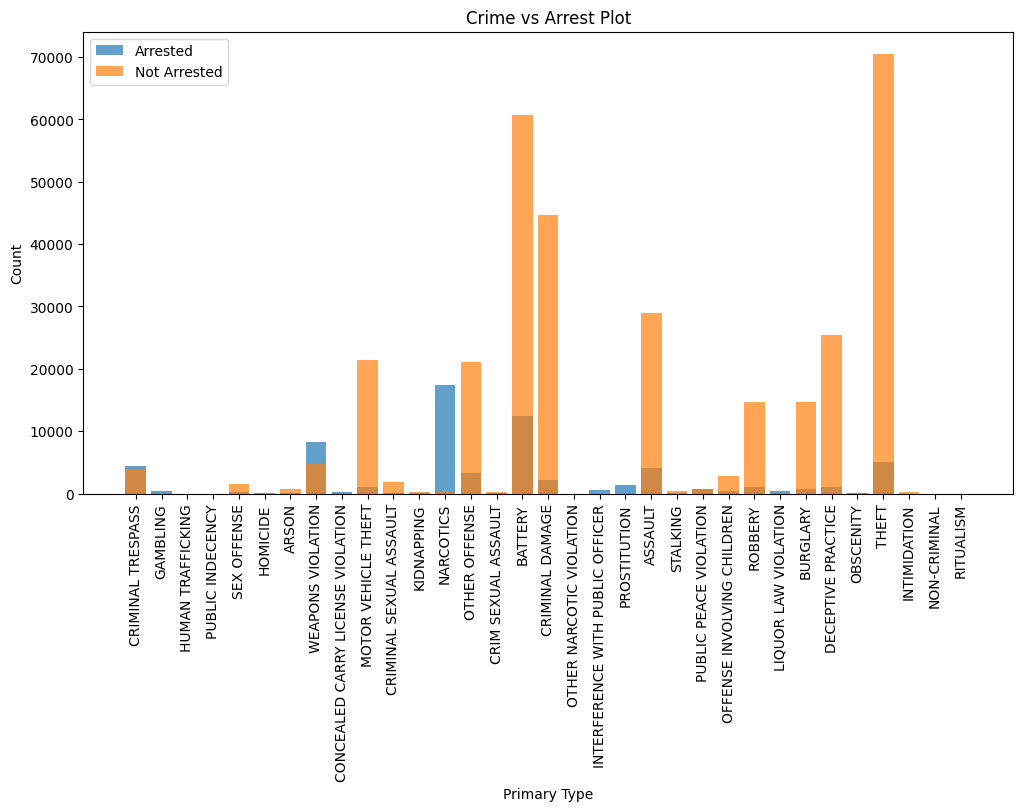

In [ ]:
crime_arrest_agg = df1.groupBy("Primary Type", "Arrest").count()

# Convert the PySpark DataFrame to a Pandas DataFrame
crime_arrest_agg_df = crime_arrest_agg.toPandas()

# Filter rows where Arrest is True (Arrested)
arrested = crime_arrest_agg_df[crime_arrest_agg_df["Arrest"] == True]

# Filter rows where Arrest is False (Not Arrested)
not_arrested = crime_arrest_agg_df[crime_arrest_agg_df["Arrest"] == False]

# Create a bar plot for Arrested cases
plt.figure(figsize=(12, 6))
plt.bar(arrested["Primary Type"], arrested["count"], label="Arrested", alpha=0.7)

# Create a bar plot for Not Arrested cases
plt.bar(not_arrested["Primary Type"], not_arrested["count"], label="Not Arrested", alpha=0.7)

plt.xlabel("Primary Type")
plt.ylabel("Count")
plt.title("Crime vs Arrest Plot")
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Plot 6: FBI codes used to control crime**

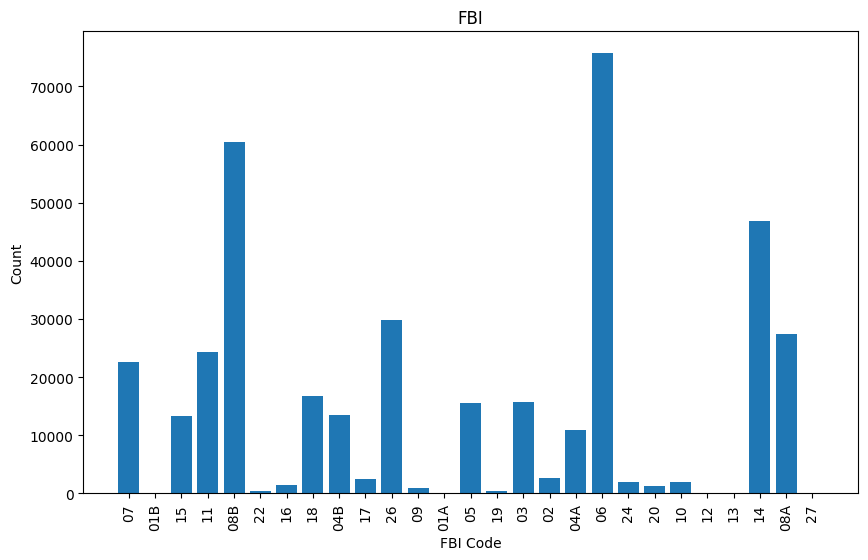

In [ ]:
fbi_agg = df1.groupBy("FBI Code").count()
fbi_agg_df = fbi_agg.toPandas()



plt.figure(figsize=(10, 6))
plt.bar(fbi_agg_df["FBI Code"],fbi_agg_df["count"])
plt.xlabel("FBI Code")
plt.ylabel("Count")
plt.title("FBI")
plt.xticks(rotation=90) # Equal aspect ratio ensures the pie chart is circular.
plt.show()




**Plot 6: Sucess of FBI code in arrests**

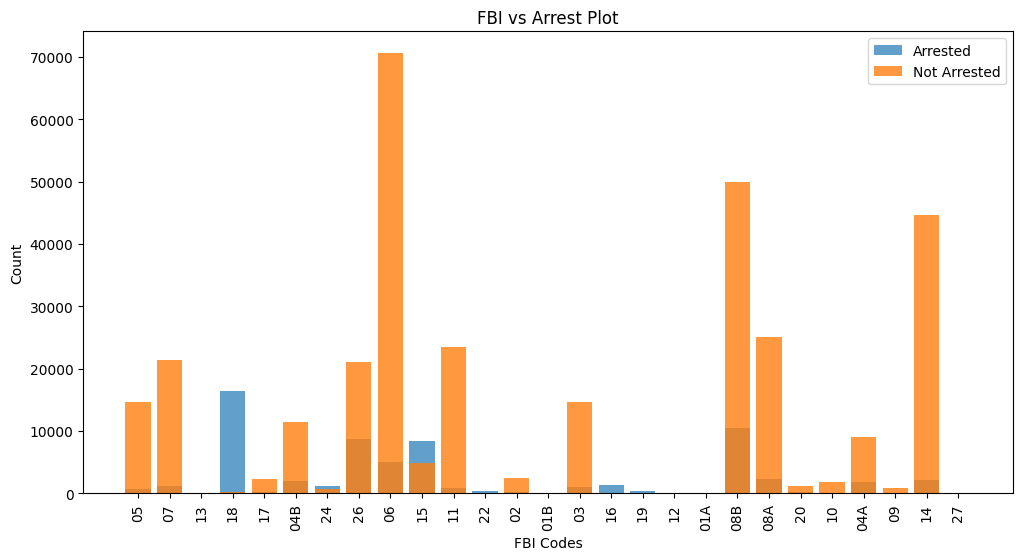

In [ ]:
fbi_arrest_agg = df1.groupBy("FBI Code", "Arrest").count()

# Convert the PySpark DataFrame to a Pandas DataFrame
fbi_arrest_agg_df = fbi_arrest_agg.toPandas()

# Filter rows where Arrest is True (Arrested)
arrestedfbi = fbi_arrest_agg_df[fbi_arrest_agg_df["Arrest"] == True]

# Filter rows where Arrest is False (Not Arrested)
not_arrestedfbi = fbi_arrest_agg_df[fbi_arrest_agg_df["Arrest"] == False]

# Create a bar plot for Arrested cases
plt.figure(figsize=(12, 6))
plt.bar(arrestedfbi["FBI Code"], arrestedfbi["count"], label="Arrested", alpha=0.7)

# Create a bar plot for Not Arrested cases
plt.bar(not_arrestedfbi["FBI Code"], not_arrestedfbi["count"], label="Not Arrested", alpha=0.8)

plt.xlabel("FBI Codes")
plt.ylabel("Count")
plt.title("FBI vs Arrest Plot")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# Group the DataFrame by "Primary Type" and "Community Area" and count occurrences
crime_community_agg = df1.groupBy("Primary Type", "Community Area").count()

crime_community_agg.show()

+--------------------+--------------+-----+
|        Primary Type|Community Area|count|
+--------------------+--------------+-----+
|             BATTERY|            48|  396|
|             ASSAULT|            66|  895|
| MOTOR VEHICLE THEFT|            55|   46|
|   WEAPONS VIOLATION|            30|  363|
|   WEAPONS VIOLATION|            23|  488|
|       OTHER OFFENSE|            54|  139|
|               ARSON|            58|    6|
|           OBSCENITY|            11|    2|
|            HOMICIDE|            70|    1|
|LIQUOR LAW VIOLATION|            52|    2|
|  DECEPTIVE PRACTICE|            52|  121|
|             ROBBERY|            14|  130|
|             ASSAULT|            70|  335|
|             ROBBERY|            53|  202|
| MOTOR VEHICLE THEFT|            44|  600|
|            BURGLARY|            47|   23|
| CRIM SEXUAL ASSAULT|            59|    1|
|  DECEPTIVE PRACTICE|            43|  602|
| MOTOR VEHICLE THEFT|            52|  144|
|     CRIMINAL DAMAGE|          

**Plot 7: Maximum crimes happened each year**

+----+--------------------+-----+
|Year|        Primary Type|count|
+----+--------------------+-----+
|2021|PUBLIC PEACE VIOL...|  483|
|2019|     CRIMINAL DAMAGE|   74|
|2004|        PROSTITUTION|    5|
|2021|        NON-CRIMINAL|    4|
|2002|             ASSAULT|    5|
|2003|             ASSAULT|    4|
|2016|CRIMINAL SEXUAL A...|    2|
|2023|               THEFT| 9206|
|2018|           NARCOTICS|    1|
|2021|LIQUOR LAW VIOLATION|  140|
|2022|             ROBBERY|  856|
|2020|            HOMICIDE|    7|
|2005|   WEAPONS VIOLATION|  766|
|2022|             ASSAULT| 1759|
|2023|   HUMAN TRAFFICKING|    3|
|2019|             ASSAULT|   67|
|2009|             ROBBERY|   11|
|2022|   CRIMINAL TRESPASS|  339|
|2017|       OTHER OFFENSE|    1|
|2023|   CRIMINAL TRESPASS|  677|
+----+--------------------+-----+
only showing top 20 rows



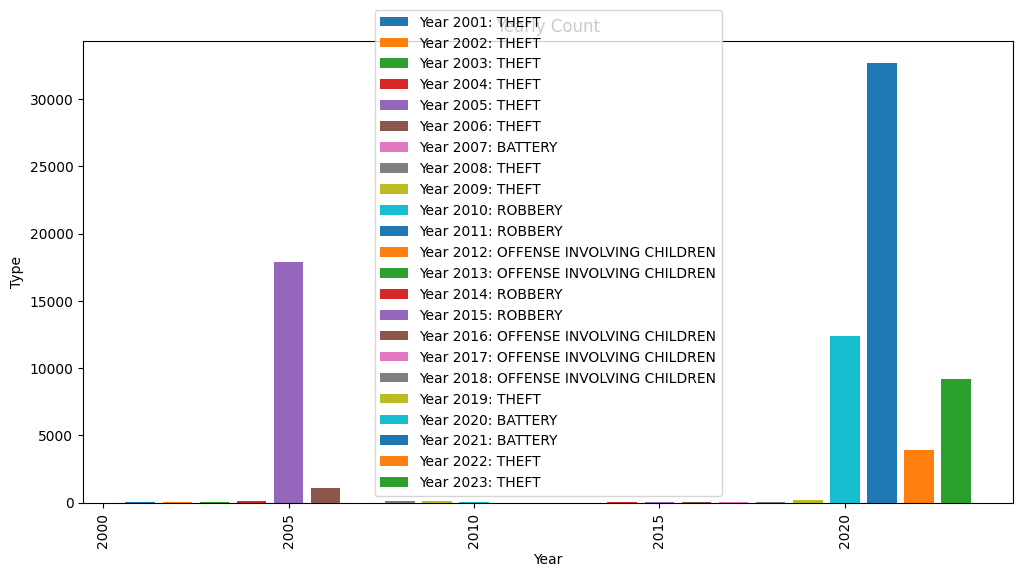

In [ ]:
yearly_crime=df1.groupby("Year","Primary Type").count()
yearly_crime.show()

yearly_crime_agg=yearly_crime.toPandas()

# Find the most frequent Primary Type for each Year
most_frequent_crime = yearly_crime_agg.groupby("Year")["count"].idxmax()
most_frequent_crime_types = yearly_crime_agg.loc[most_frequent_crime]

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
for year, data in most_frequent_crime_types.groupby("Year"):
    plt.bar(data["Year"], data["count"], label=f"Year {year}: {data['Primary Type'].values[0]}")

plt.title("Yearly Count")
plt.xlabel("Year")
plt.ylabel("Type")
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
from pyspark.sql import functions as F
# Group the DataFrame by "Year" and "Primary Type" and count occurrences
yearly_crime = df1.groupBy("Year", "Primary Type").count()

# Find the most common crime type for each year
most_common_crime = yearly_crime.groupBy("Year").agg(F.max("count").alias("max_count"))
most_common_crime = most_common_crime.join(yearly_crime, (most_common_crime["Year"] == yearly_crime["Year"]) & (most_common_crime["max_count"] == yearly_crime["count"]))
most_common_crime = most_common_crime.drop("max_count")

most_common_crime.show(25)

+----+----+--------------------+-----+
|Year|Year|        Primary Type|count|
+----+----+--------------------+-----+
|2003|2003|               THEFT|   49|
|2007|2007|             ASSAULT|    3|
|2007|2007|             BATTERY|    3|
|2018|2018|OFFENSE INVOLVING...|   25|
|2015|2015|             ROBBERY|   18|
|2023|2023|               THEFT| 9206|
|2006|2006|               THEFT| 1066|
|2022|2022|               THEFT| 3896|
|2013|2013|OFFENSE INVOLVING...|    7|
|2014|2014|             ROBBERY|   31|
|2019|2019|               THEFT|  186|
|2004|2004|               THEFT|  122|
|2020|2020|             BATTERY|12351|
|2012|2012|OFFENSE INVOLVING...|    5|
|2009|2009|               THEFT|  119|
|2016|2016|OFFENSE INVOLVING...|   15|
|2001|2001|               THEFT|   26|
|2005|2005|               THEFT|17874|
|2010|2010|             ROBBERY|   11|
|2011|2011|             ROBBERY|    6|
|2008|2008|               THEFT|   87|
|2017|2017|OFFENSE INVOLVING...|   13|
|2002|2002|              